*Individual Assignment #0 - Basic data manipulation #DavidOrdoñezVivar*

# **NYC Taxi Dataset**

The first assignment is to answer some basic questions about a sample of the "NYC Taxi Dataset". The URLs were taken from https://github.com/toddwschneider/nyc-taxi-data/.

Notice that, even though we will use only a subset, this needs around 2 GB of RAM, plus a margin to do the analysis! if your computer is not capable enough, you can use https://colab.research.google.com/, which gives you a Jupyter installation with 12 GB of RAM for free.

1. Load https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv into pandas, using an appropriate column as an index and parsing the columns that have dates
2. Display the first 5 rows, a statistical summary, and the dtypes of the columns
3. Do you find any inconsistency in fares or distance data? If so, remove them from the dataset
4. Try to plot a histogram of the trip distance distribution. What happens? Try increasing the number of bins, normalizing the data, or using a logarithmic scale in the Y axis to actually see something
5. What is the median trip distance per passenger count? Represent it in text and graphical form
6. Create a new column payment_type_text that is 'Cash' if payment_type is 2 and 'Other' otherwise
7. Bonus points: what is the correlation between leaving no tip and paying with cash? 

The grading will be as follows: 0.5 points for each correct answer above, and 1 extra point for overall presentation, aesthetics, code quality and originality. Yes: the maximum theoretical grade is thus 4.5 out of 4, but only 4 points will be awarded.

The format of the delivery *must* be a Jupyter notebook that should run, top to bottom, without errors on a capable computer with Python 3.6. It should include explanations in the form of text cells, and code comments where appropriate.

In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


#1.
Load https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv into pandas, using an appropriate column as an index and parsing the columns that have dates*




In [3]:
df=pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-10.csv', parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36


#2.
Display the first 5 rows, a statistical summary, and the dtypes of the columns

In [15]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36


In [16]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06,9.768815e+06
mean,1.549415e+00,1.617468e+00,2.964095e+00,1.045011e+00,1.630937e+02,1.612835e+02,1.328251e+00,1.338078e+01,3.300792e-01,4.972671e-01,1.883138e+00,3.479925e-01,2.996095e-01,1.674133e+01
std,4.975522e-01,1.259104e+00,3.814063e+00,4.748632e-01,6.624797e+01,7.015271e+01,4.901289e-01,3.078552e+02,4.644125e-01,1.177005e-01,2.634506e+00,1.696558e+00,1.438805e-02,3.079748e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.600000e+02,-5.800000e+01,-5.000000e-01,-4.100000e+01,-1.500000e+01,-3.000000e-01,-4.603000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.225000e+01
75%,2.000000e+00,2.000000e+00,3.070000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.830000e+01
max,2.000000e+00,9.000000e+00,1.178600e+03,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.616024e+05,9.600000e+01,2.500000e+02,4.445000e+02,9.296500e+02,1.000000e+00,8.616032e+05


In [17]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

#3. 
Do you find any inconsistency in fares or distance data? If so, remove them from the dataset


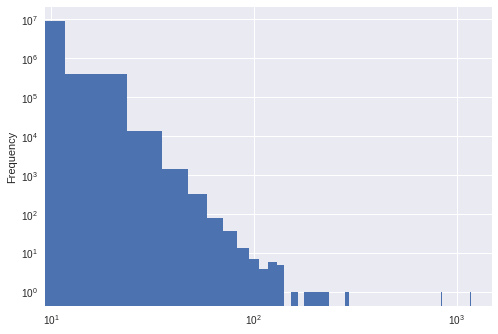

In [5]:
df['trip_distance'].plot.hist(bins=100,logy=True,logx=True)
#x=trip distance
#y=count

## Inconsistency  in distance data




In order to find any inconsistency we are going to use the standard deviation that shows how much the individual data points are spread out from the mean.

We can start out and review the spread of each attribute by looking at box

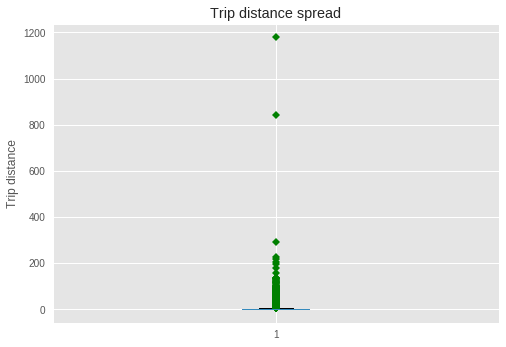

In [19]:

df.boxplot(column='trip_distance')
plt.boxplot(df['trip_distance'], 0, 'gD')
plt.title('Trip distance spread')
plt.ylabel('Trip distance')
plt.show()




We can see that the test attribute has a lot of outliers, hight to 1200. 

This show us that some of these values are observations that lies an abnormal distance from other values.

In [0]:
import scipy
from scipy.stats import norm
from matplotlib.mlab import normpdf

Other way of showing these outliers is this histogram showed below.

My goal in this case was to show something like this:


![Imagen](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg)

After a long search trying to find the best way of doing it, I found this code.
https://stackoverflow.com/questions/49630427/how-to-plot-normal-distribution-with-percentage-of-data-as-label-in-each-band-bi

I found this very interesting and I tried to apply it to our data. I think it's very interesting and I think it would be good to go through it in lessons.


0.0
1178.6
1.0 1.65 3.07
0.3652203081374199
0.09857011203797357


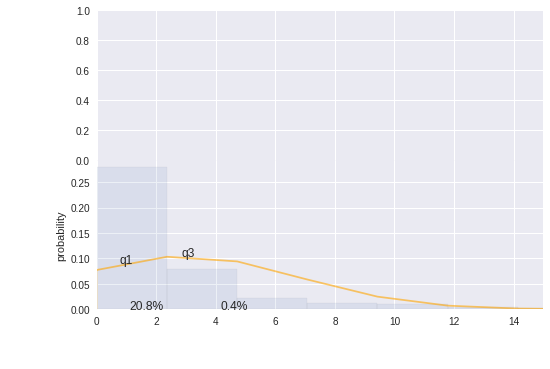

In [33]:

# dummy data
mu = df['trip_distance'].mean()
sigma = df['trip_distance'].std()
n_bins = 500
s = np.array(df['trip_distance'])

print(df['trip_distance'].min())
print(df['trip_distance'].max())


fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

#histogram
n, bins, patches = axes[1].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
print(q1, median, q3)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

print(norm(mu, sigma).cdf(median))#Cumulative density function.
print(norm(mu, sigma).pdf(median))

#add text to bottom graph.
axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

axes[1].set_ylabel('probability')

plt.subplots_adjust(hspace=0)
plt.xlim(0, 15)

plt.show()



 The value for standard deviation defines a range above and below the mean for which a certain percentage of the data lie.

 

Thanks to the histogram and the boxplot we see that in the data of the distance of the trip, we have some values that go far from the average, so we can assume that they are erroneous values, so we proceed to remove them.

I have consider that if the distance of the trip is lower than 0 and higher than 10 the value is not useful and I am going to replace these values for the mediam value.

In [13]:
df['trip_distance'].mean()

df['trip_distance'][df['trip_distance']>10]=2.9640951282217993
df['trip_distance'][df['trip_distance']<=0]=2.9640951282217993

df.loc[(df['trip_distance']==2.9640951282217993)].count()
#df['trip_distance'].head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


VendorID                 655245
tpep_pickup_datetime     655245
tpep_dropoff_datetime    655245
passenger_count          655245
trip_distance            655245
RatecodeID               655245
store_and_fwd_flag       655245
PULocationID             655245
DOLocationID             655245
payment_type             655245
fare_amount              655245
extra                    655245
mta_tax                  655245
tip_amount               655245
tolls_amount             655245
improvement_surcharge    655245
total_amount             655245
payment_type_text        655245
dtype: int64

## Inconsistency in fares data




In order to find any inconsistency we are going to use the standard deviation that shows how much the individual data points are spread out from the mean.

We can start out and review the spread of each attribute by looking at box

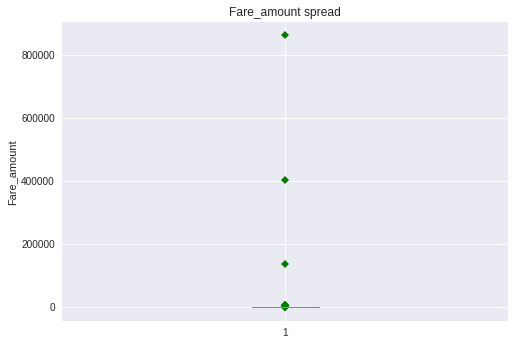

In [35]:
df.boxplot(column='fare_amount')
plt.boxplot(df['fare_amount'], 0, 'gD')
plt.title('Fare_amount spread')
plt.ylabel('Fare_amount')
plt.show()


We can see that the test attribute has a lot of outliers, hight to 800000. 

This show us that some of these values are observations that lies an abnormal distance from other values.

Other way of showing these outliers is this histogram showed below.


-460.0
861602.44
6.5 9.5 15.0
0.4949711287020421
0.00129577323871038


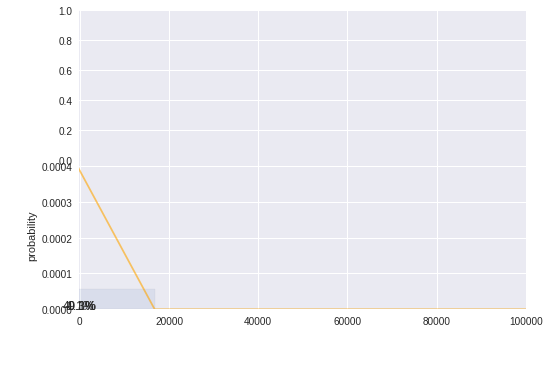

In [42]:
# dummy data
mu = df['fare_amount'].mean()
sigma = df['fare_amount'].std()
n_bins = 50
s = np.array(df['fare_amount'])

print(df['fare_amount'].min())
print(df['fare_amount'].max())


fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

#histogram
n, bins, patches = axes[1].hist(s, n_bins, normed=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
print(q1, median, q3)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

print(norm(mu, sigma).cdf(median))#Cumulative density function.
print(norm(mu, sigma).pdf(median))

#add text to bottom graph.
axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

axes[1].set_ylabel('probability')

plt.subplots_adjust(hspace=0)
plt.xlim(-100, 100000)

plt.show()



The value for standard deviation defines a range above and below the mean for which a certain percentage of the data lie.

Thanks to the histogram and the boxplot we see that in the data of the fares amount, we have some values that go far from the average, so we can assume that they are erroneous values, so we proceed to remove them.

I have consider that if the fare amount is lower than 0, it is not fare therefore the value is not useful and if the value is higher than 20, it will be much over the mediam so I am going to replace these values for the mediam value.



In [14]:
df['fare_amount'].mean()
df['fare_amount'][df['fare_amount']>20]=13.38077541544187
df['fare_amount'][df['fare_amount']<=0]=13.38077541544187

df.loc[(df['fare_amount']==13.38077541544187)].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


VendorID                 1460236
tpep_pickup_datetime     1460236
tpep_dropoff_datetime    1460236
passenger_count          1460236
trip_distance            1460236
RatecodeID               1460236
store_and_fwd_flag       1460236
PULocationID             1460236
DOLocationID             1460236
payment_type             1460236
fare_amount              1460236
extra                    1460236
mta_tax                  1460236
tip_amount               1460236
tolls_amount             1460236
improvement_surcharge    1460236
total_amount             1460236
payment_type_text        1460236
dtype: int64

**Just to show the result.**

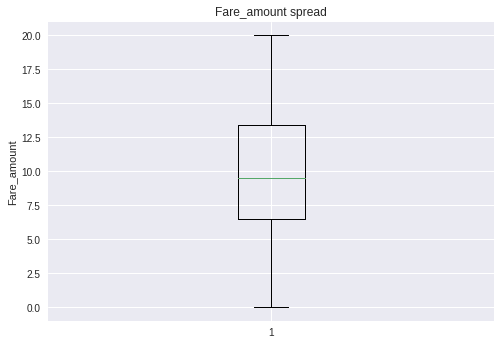

In [46]:
df.boxplot(column='fare_amount')
plt.boxplot(df['fare_amount'], 0, 'gD')
plt.title('Fare_amount spread')
plt.ylabel('Fare_amount')
plt.show()

#4.
Try to plot a histogram of the trip distance distribution. What happens? Try increasing the number of bins, normalizing the data, or using a logarithmic scale in the Y axis to actually see something

*Histogram of the trip distance distribution. What happens? *

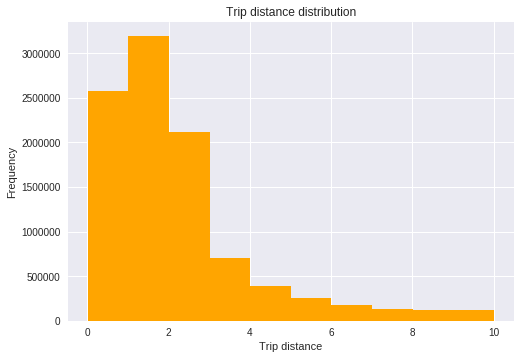

In [52]:
df['trip_distance'].plot.hist(color="orange")
plt.xlabel('Trip distance')
plt.title('Trip distance distribution')
plt.show()

What happens is that the number of trips decrease as the trip distance is longer

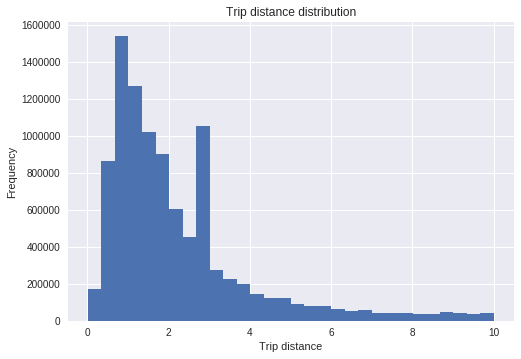

In [59]:
#Increasing the number of bins
df['trip_distance'].plot.hist(bins=30)
plt.xlabel('Trip distance')
plt.title('Trip distance distribution')
plt.show()

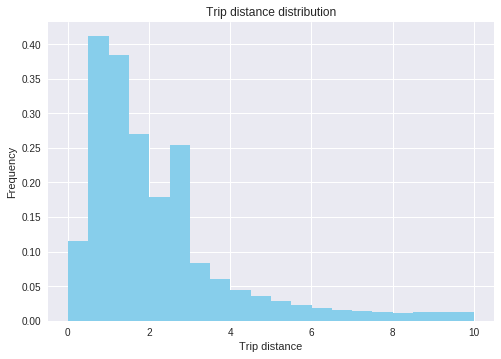

In [53]:
#Normalizing Data
df['trip_distance'].plot(kind='hist', density=1, bins=20, stacked=False,color="skyblue")
plt.xlabel('Trip distance')
plt.title('Trip distance distribution')
plt.show()

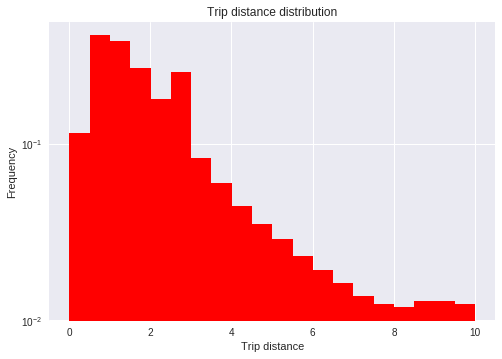

In [55]:
#Using a logarithmic scale in the Y
ax=df['trip_distance'].plot(kind='hist', density=1, bins=20, stacked=False, color="red")
ax.set_yscale('log')
plt.xlabel('Trip distance')
plt.title('Trip distance distribution')
plt.show()

#5. 
What is the median trip distance per passenger count? Represent it in text and graphical form

In [56]:
#Represent in text
median_tripdistance_per_passenger_count=df.groupby('passenger_count')['trip_distance'].median()
print(median_tripdistance_per_passenger_count)

passenger_count
0    1.600000
1    1.650000
2    1.730000
3    1.700000
4    1.780000
5    1.710000
6    1.680000
7    2.964095
8    2.964095
9    2.964095
Name: trip_distance, dtype: float64


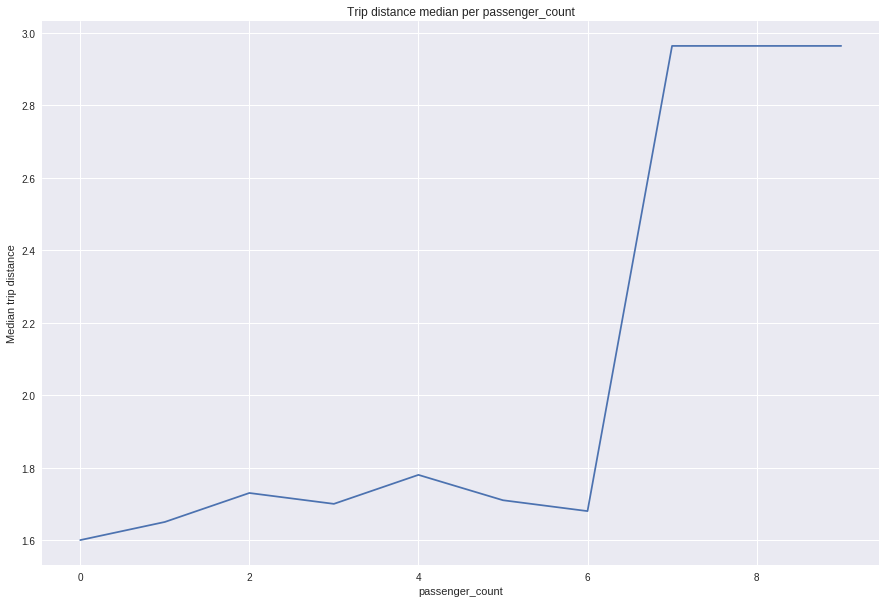

In [57]:
#Represent in graphical
fig, ax = plt.subplots(figsize=(15,10))
median_tripdistance_per_passenger_count.plot(ax=ax)
plt.title('Trip distance median per passenger_count')
plt.ylabel('Median trip distance')
plt.show()

#6. 
Create a new column payment_type_text that is 'Cash' if payment_type is 2 and 'Other' otherwise

In [15]:
#%%timeit
def check_it(input_str):
  if input_str == 2:
    return 'Cash'
  return 'Other'

df.loc[:,'payment_type_text'] = df.payment_type.apply(check_it)
df.head()

#data['payment_type_text']='Cash'
#data.loc[data['payment_type']!=2,'payment_type_text']='other'

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type_text
0,1,2017-10-01 00:01:50,2017-10-01 00:14:13,1,2.00,1,N,142,233,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,Cash
1,1,2017-10-01 00:02:43,2017-10-01 00:08:35,2,2.30,1,N,142,166,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Other
2,1,2017-10-01 00:12:08,2017-10-01 00:25:49,3,2.80,1,N,151,262,1,13.0,0.5,0.5,1.72,0.0,0.3,16.02,Other
3,2,2017-10-01 00:00:25,2017-10-01 00:11:24,1,1.97,1,N,100,229,1,9.5,0.5,0.5,1.00,0.0,0.3,11.80,Other
4,2,2017-10-01 00:15:30,2017-10-01 00:25:11,1,2.17,1,N,141,142,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,Other


#7.
Bonus points: what is the correlation between leaving no tip and paying with cash? 

In [11]:
(df['tip_amount']==0).corr(df['payment_type_text']=='Cash')

0.9201316511085742

In [18]:
no_tip=df['tip_amount']==0
cash=df['payment_type_text']=='Cash'
pd.concat([cash,no_tip])
pd.concat([cash,no_tip],axis=1).corr()

,payment_type_text,tip_amount
payment_type_text,1.000000,0.920132
tip_amount,0.920132,1.000000


In [19]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.264023,0.015397,0.004314,-0.016988,-0.011777,-0.023344,0.010707,0.005310,-0.001116,0.014550,0.011548,-0.020501,0.000383
passenger_count,0.264023,1.000000,0.011513,-0.004531,-0.006508,-0.005705,0.012003,0.014630,0.007354,0.000088,-0.004805,0.008762,-0.002320,0.000256
trip_distance,0.015397,0.011513,1.000000,0.039717,-0.067964,-0.092437,-0.064656,0.686395,0.037513,-0.004939,0.357020,0.256287,0.012943,0.025324
RatecodeID,0.004314,-0.004531,0.039717,1.000000,-0.005559,-0.002756,-0.000595,0.072516,0.028768,-0.040012,0.191114,0.238302,-0.086186,0.016041
PULocationID,-0.016988,-0.006508,-0.067964,-0.005559,1.000000,0.105101,-0.010792,-0.055561,-0.012510,-0.000492,-0.038591,-0.040307,-0.002693,-0.003408
DOLocationID,-0.011777,-0.005705,-0.092437,-0.002756,0.105101,1.000000,-0.010606,-0.082395,-0.013901,0.013808,-0.045933,-0.045868,-0.001963,-0.003546
payment_type,-0.023344,0.012003,-0.064656,-0.000595,-0.010792,-0.010606,1.000000,-0.072385,-0.022375,-0.016961,-0.478712,-0.036873,-0.080441,-0.005209
fare_amount,0.010707,0.014630,0.686395,0.072516,-0.055561,-0.082395,-0.072385,1.000000,0.028398,-0.017348,0.338954,0.175127,-0.018879,0.026081
extra,0.005310,0.007354,0.037513,0.028768,-0.012510,-0.013901,-0.022375,0.028398,1.000000,0.003432,0.071706,0.049143,0.033456,0.014058
mta_tax,-0.001116,0.000088,-0.004939,-0.040012,-0.000492,0.013808,-0.016961,-0.017348,0.003432,1.000000,-0.043025,-0.086255,0.177453,-0.001127


We have a strong correlation beteewn these two variables. Paying with Cash means a strong posibility of not leaving Tip.